In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('train.csv')
df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [32]:
df.columns

Index(['ID1', 'Specific ailments', 'ID2', 'Food preference', 'Age', 'BMI',
       'Smoker?', 'Living in?', 'Any heriditary condition?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year', 'Healthy'],
      dtype='object')

In [33]:
df['Smoker?'] = df['Smoker?'].apply(lambda x: 1 if x == 'YES' else 0)

In [34]:
for i in df.columns:
    print(i," ",df[i].unique())

ID1   [ 2408 25063 26798 ...  4263 11208 21535]
Specific ailments   [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 36 19 25 11 37 52 42  8 24 31 30 26 50 22 40 32 45 47
 35  3 46 23  0]
ID2   [ 2668 10363   132 ...  6886  2521 12190]
Food preference   ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' nan 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
Age   [ 49  20   1  30  40  64  26   4  12  42  65   3  63  32  10  48  47   9
  11   7  24  23  25  62  13   8  57  52  54  44  56  22  29  60  43  58
   5  27  15  51  37  46  19  17  16   0   6  34  50  33  41  28  21   2
  18  59  53  31  39  66  55  61  36  45  14  3

In [35]:
# continuous_num_feature=['Age','BMI']
#binary_num_feature=[]


In [36]:
df[df['Healthy']==1].iloc[:,14].value_counts()

0.0    14719
1.0      835
Name: Taking supplements, dtype: int64

In [37]:
df[df['Healthy']==1].iloc[:,11].value_counts()

0.0    12864
1.0     2690
Name: Regular sleeping hours, dtype: int64

In [38]:
def add_good(df):
    df['good']=(1-df['Taking supplements'] )* (1-df['Alcohol consumption']) * (1-df['Smoker?'])
    return df

In [39]:
df=add_good(df)
#df=add_bad(df)

In [40]:
df['abnormal_weight']=df['BMI'].apply(lambda x:1 if (x<18 or x>25) else 0)
#df['over_weight']=df['BMI'].apply(lambda x:1 if x>25 else 0)
#df['normal_weight']=df['BMI'].apply(lambda x:1 if (x<=25 and x>=18) else 0)


In [41]:
#df['young']=df['Age'].apply(lambda x:1 if x<=45 else 0)
df['old']=df['Age'].apply(lambda x:1 if x>60 else 0)
#df['normal_age']=df['Age'].apply(lambda x:1 if (x<=45 and x>=18) else 0)



In [42]:
df.describe()

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,good,abnormal_weight,old
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,25920.000000,24947.000000,25920.000000,25920.000000
mean,16503.583989,26.502701,6256.104282,33.235610,23.461925,0.423302,0.895739,0.138053,0.184391,0.084219,0.396881,0.053073,0.000401,1.752756,0.628858,0.500541,0.454823,0.093171
std,9522.571120,15.056563,3611.224659,19.532157,3.791150,0.494092,0.305605,0.344962,0.387810,0.277721,0.489261,0.224183,0.020018,0.767824,0.483120,0.500010,0.497964,0.290678
min,1.000000,0.000000,1.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8251.750000,13.000000,3151.000000,16.000000,20.214882,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,16531.500000,26.000000,6246.000000,33.000000,23.415330,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,24701.500000,40.000000,9391.250000,50.000000,26.768378,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df.shape

(25920, 21)

In [44]:
#as very few are null 
#df=df.dropna(axis=0)

In [45]:
df.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
good                         973
abnormal_weight                0
old                            0
dtype: int64

In [46]:
df.shape

(25920, 21)

<Axes: ylabel='Healthy'>

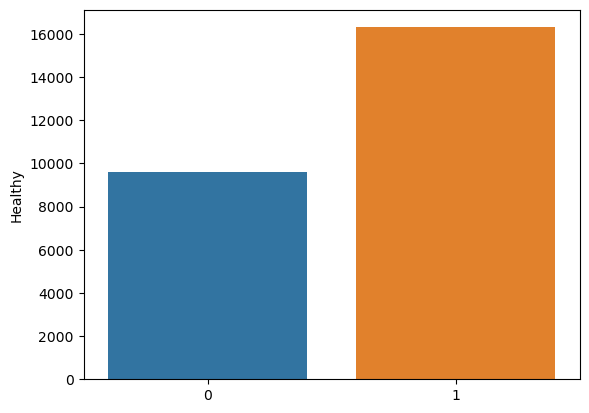

In [47]:
sns.barplot(y=df['Healthy'].value_counts(),x=df['Healthy'].value_counts().index)

In [48]:
#Imbalanced class

In [49]:
total_healthy=df['Healthy'].value_counts()[1]
total_unhealthy=df['Healthy'].value_counts()[0]

In [50]:
total_healthy

16300

In [51]:
df.duplicated().sum() 

0

In [52]:
# no duplicates present

In [53]:
# dropping column= 'Any heriditary condition?' as only 'stable' is the unique value
df=df.drop(columns=['ID1','ID2','Any heriditary condition?','Mental health management'],axis=1)

In [54]:
df.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Illness count last year,Healthy,good,abnormal_weight,old
0,44,DX6,49,20.500470,0,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0,0
1,39,DX3 DX4,20,26.076580,0,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1.0,1,0
2,29,DX6,1,21.420866,0,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0
3,27,DX1,30,25.203247,0,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1,0
4,9,DX6,40,19.355846,1,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1,0.0,0,0


In [55]:
for i in df.columns:
    print(i," ",df[i].unique())

Specific ailments   [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 36 19 25 11 37 52 42  8 24 31 30 26 50 22 40 32 45 47
 35  3 46 23  0]
Food preference   ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' nan 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
Age   [ 49  20   1  30  40  64  26   4  12  42  65   3  63  32  10  48  47   9
  11   7  24  23  25  62  13   8  57  52  54  44  56  22  29  60  43  58
   5  27  15  51  37  46  19  17  16   0   6  34  50  33  41  28  21   2
  18  59  53  31  39  66  55  61  36  45  14  35  38 114 125 132 112 149
 128 142 115 138]
BMI   [20.50046954 26.07657952 21.42086578 ... 20.13

In [56]:
df['Food preference'].value_counts()

DX6                     9639
DX5                     2167
DX2                     2128
DX4                     2099
DX3                     2072
DX1                     2063
DX1 DX2                  480
DX2 DX4                  476
DX3 DX4                  471
DX1 DX3                  461
DX4 DX5                  459
DX2 DX5                  459
DX2 DX3                  452
DX1 DX5                  450
DX3 DX5                  443
DX1 DX4                  437
DX1 DX2 DX5              116
DX1 DX3 DX4              113
DX1 DX2 DX3              110
DX1 DX2 DX4              110
DX3 DX4 DX5              109
DX2 DX3 DX5              105
DX1 DX3 DX5               98
DX2 DX4 DX5               98
DX2 DX3 DX4               90
DX1 DX4 DX5               89
DX1 DX3 DX4 DX5           27
DX2 DX3 DX4 DX5           26
DX1 DX2 DX4 DX5           23
DX1 DX2 DX3 DX4           20
DX1 DX2 DX3 DX5           16
DX1 DX2 DX3 DX4 DX5        4
Name: Food preference, dtype: int64

In [57]:
import re
def remove_special(text):
    clean_text = re.sub(r"[^1-9]", "", text)
    return clean_text

In [58]:
df['Food preference']=df['Food preference'].fillna("")

In [59]:
df['Food preference']=df['Food preference'].apply(remove_special)

In [60]:
df['Food preference']=df['Food preference'].astype('str')

In [61]:
df['Food preference'].value_counts()

6        9639
5        2167
2        2128
4        2099
3        2072
1        2063
12        480
24        476
34        471
13        461
45        459
25        459
23        452
15        450
35        443
14        437
125       116
134       113
123       110
124       110
345       109
235       105
135        98
245        98
234        90
145        89
1345       27
2345       26
1245       23
1234       20
1235       16
           10
12345       4
Name: Food preference, dtype: int64

In [62]:
df['X1']=df['Food preference'].apply(lambda x:1 if '1' in x else 0)
df['X2']=df['Food preference'].apply(lambda x:1 if '2' in x else 0)
df['X3']=df['Food preference'].apply(lambda x:1 if '3' in x else 0)
df['X4']=df['Food preference'].apply(lambda x:1 if '4' in x else 0)
df['X5']=df['Food preference'].apply(lambda x:1 if '5' in x else 0)
df['X6']=df['Food preference'].apply(lambda x:1 if '6' in x else 0)


In [63]:
df['Illness count last year'].value_counts()

1.0    10646
2.0    10342
3.0     3475
4.0      449
5.0       35
Name: Illness count last year, dtype: int64

In [64]:
#df['Mental health management'].value_counts()

In [65]:
df.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,...,Healthy,good,abnormal_weight,old,X1,X2,X3,X4,X5,X6
0,44,6,49,20.500470,0,RURAL,1.0,0.0,0.0,0.0,...,1,1.0,0,0,0,0,0,0,0,1
1,39,34,20,26.076580,0,URBAN,0.0,0.0,0.0,0.0,...,1,1.0,1,0,0,0,1,1,0,0
2,29,6,1,21.420866,0,URBAN,1.0,0.0,0.0,0.0,...,0,1.0,0,0,0,0,0,0,0,1
3,27,1,30,25.203247,0,RURAL,1.0,0.0,0.0,0.0,...,1,1.0,1,0,1,0,0,0,0,0
4,9,6,40,19.355846,1,RURAL,1.0,0.0,0.0,0.0,...,1,0.0,0,0,0,0,0,0,0,1


In [66]:
df.drop(columns=['Food preference'],axis=1)

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Healthy,good,abnormal_weight,old,X1,X2,X3,X4,X5,X6
0,44,49,20.500470,0,RURAL,1.0,0.0,0.0,0.0,0.0,...,1,1.0,0,0,0,0,0,0,0,1
1,39,20,26.076580,0,URBAN,0.0,0.0,0.0,0.0,1.0,...,1,1.0,1,0,0,0,1,1,0,0
2,29,1,21.420866,0,URBAN,1.0,0.0,0.0,0.0,0.0,...,0,1.0,0,0,0,0,0,0,0,1
3,27,30,25.203247,0,RURAL,1.0,0.0,0.0,0.0,0.0,...,1,1.0,1,0,1,0,0,0,0,0
4,9,40,19.355846,1,RURAL,1.0,0.0,0.0,0.0,1.0,...,1,0.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,1,RURAL,1.0,0.0,0.0,0.0,0.0,...,1,0.0,1,0,0,0,0,0,0,1
25916,39,16,27.094959,0,RURAL,1.0,0.0,0.0,0.0,0.0,...,0,1.0,1,0,0,0,0,0,0,1
25917,44,8,28.602921,0,RURAL,1.0,1.0,0.0,0.0,0.0,...,1,1.0,1,0,1,0,0,0,0,0
25918,52,52,21.909832,0,RURAL,0.0,1.0,0.0,1.0,0.0,...,1,0.0,0,0,1,0,0,0,0,0


In [67]:
df['Specific ailments'].value_counts()

1     544
49    543
19    539
8     530
11    527
17    526
12    521
25    519
36    518
48    517
29    510
30    510
40    510
6     510
51    509
7     509
34    508
52    507
46    507
39    505
45    503
24    503
41    502
43    502
20    500
5     498
35    498
13    498
22    497
16    497
44    496
32    495
27    493
42    492
21    489
4     488
33    487
3     485
10    485
23    485
47    483
9     482
18    479
31    476
28    475
15    474
50    470
26    469
38    467
37    464
2     462
14    447
0      10
Name: Specific ailments, dtype: int64

In [68]:
df.columns

Index(['Specific ailments', 'Food preference', 'Age', 'BMI', 'Smoker?',
       'Living in?', 'Follow Diet', 'Physical activity',
       'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
       'Taking supplements', 'Illness count last year', 'Healthy', 'good',
       'abnormal_weight', 'old', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'],
      dtype='object')

In [69]:
cont_num_col=['Age','BMI']
class_num_col=['Smoker?','Follow Diet','Physical activity','Regular sleeping hours','Alcohol consumption','Social interaction','Taking supplements','X1','X2','X3','X4','X5','X6','Illness count last year','abnormal_weight','old','good','Specific ailments']
cat_col=['Living in?']

In [70]:
df[['Smoker?']].head()

,Smoker?
0,0
1,0
2,0
3,0
4,1


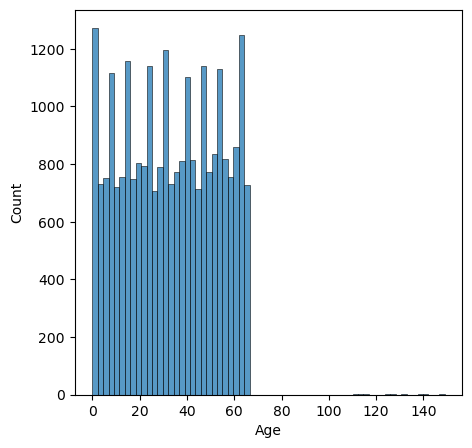

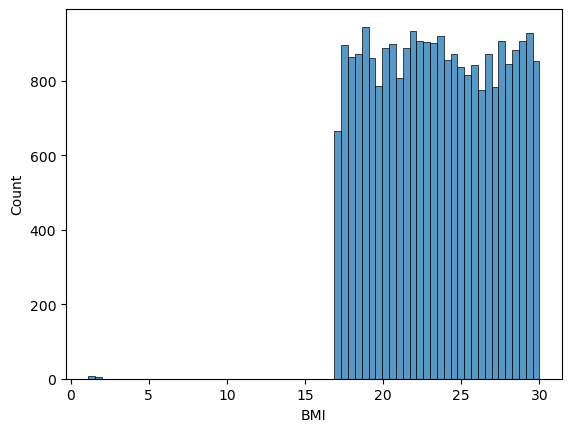

In [71]:
# Visualizing the numerical cols
plt.figure(figsize=(5,5))
for i in cont_num_col:
    sns.histplot(df[i])
    plt.show()

In [72]:
for i in class_num_col:
    print(df[i].value_counts())

0    14948
1    10972
Name: Smoker?, dtype: int64
1.0    22346
0.0     2601
Name: Follow Diet, dtype: int64
0.0    21503
1.0     3444
Name: Physical activity, dtype: int64
0.0    20347
1.0     4600
Name: Regular sleeping hours, dtype: int64
0.0    22846
1.0     2101
Name: Alcohol consumption, dtype: int64
0.0    15046
1.0     9901
Name: Social interaction, dtype: int64
0.0    23623
1.0     1324
Name: Taking supplements, dtype: int64
0    21303
1     4617
Name: X1, dtype: int64
0    21207
1     4713
Name: X2, dtype: int64
0    21303
1     4617
Name: X3, dtype: int64
0    21269
1     4651
Name: X4, dtype: int64
0    21231
1     4689
Name: X5, dtype: int64
0    16281
1     9639
Name: X6, dtype: int64
1.0    10646
2.0    10342
3.0     3475
4.0      449
5.0       35
Name: Illness count last year, dtype: int64
0    14131
1    11789
Name: abnormal_weight, dtype: int64
0    23505
1     2415
Name: old, dtype: int64
1.0    12487
0.0    12460
Name: good, dtype: int64
1     544
49    543
19    539

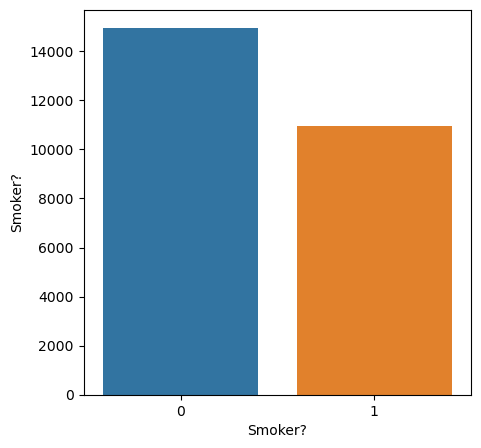

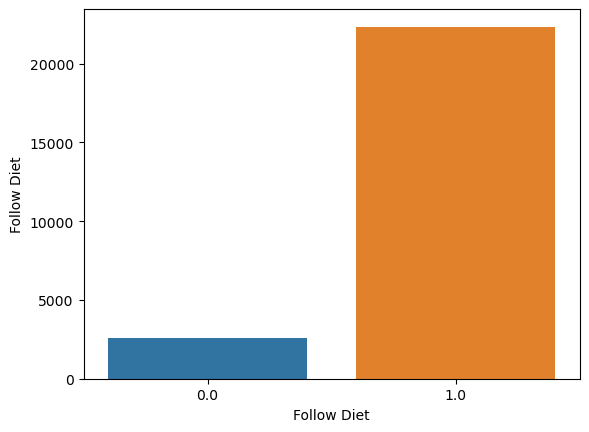

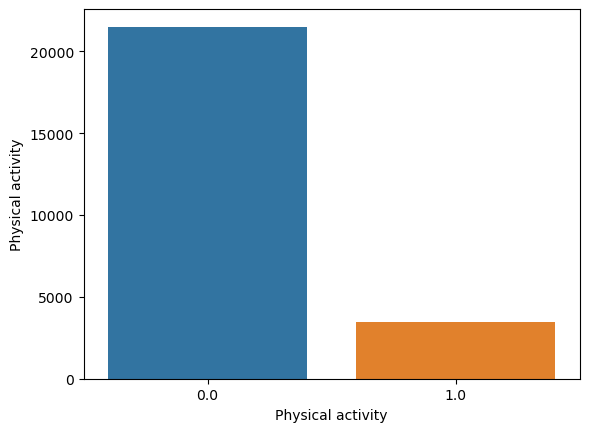

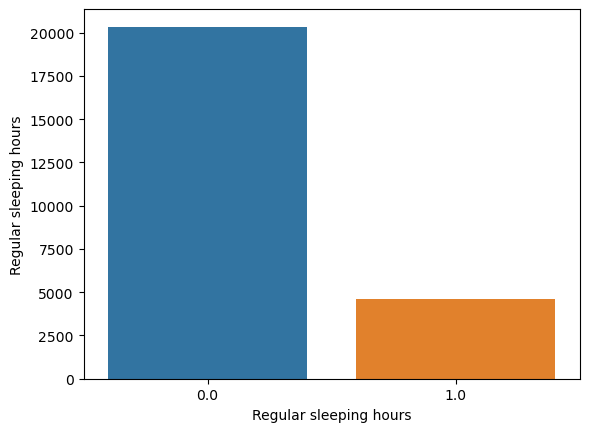

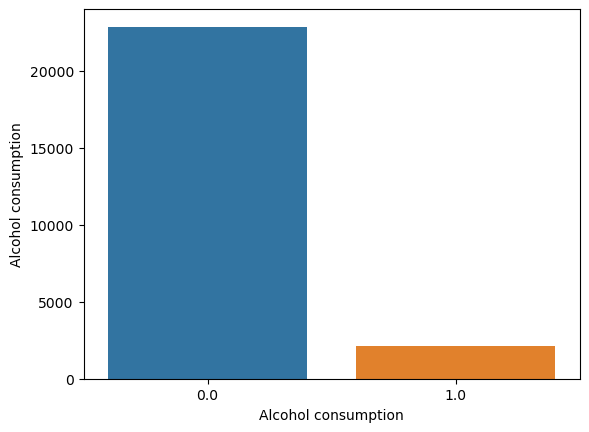

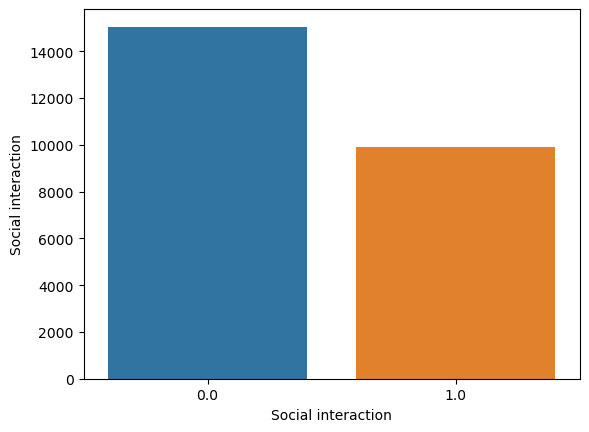

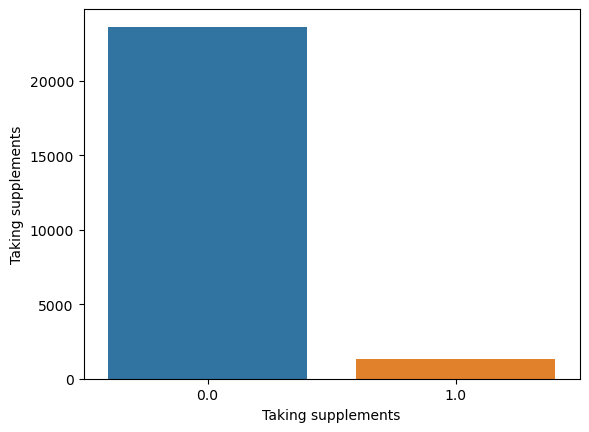

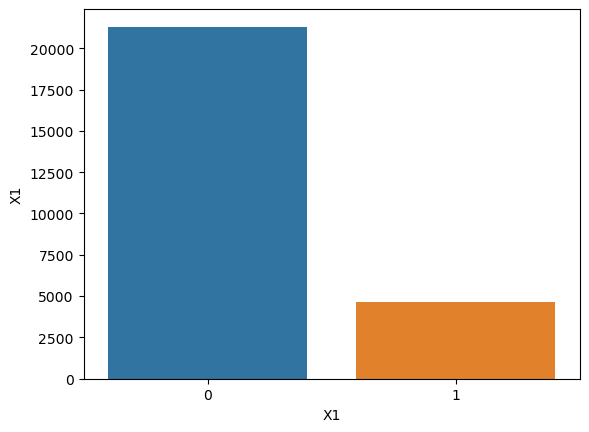

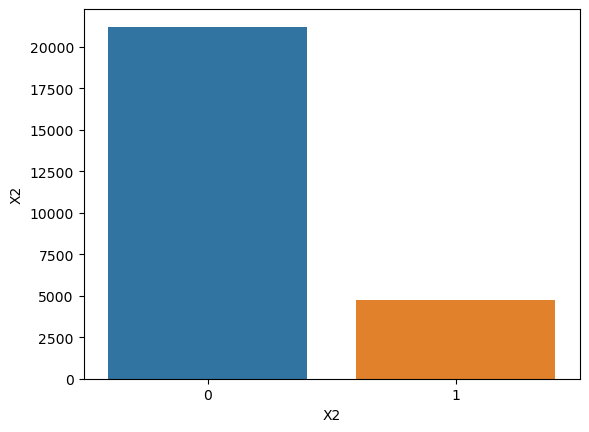

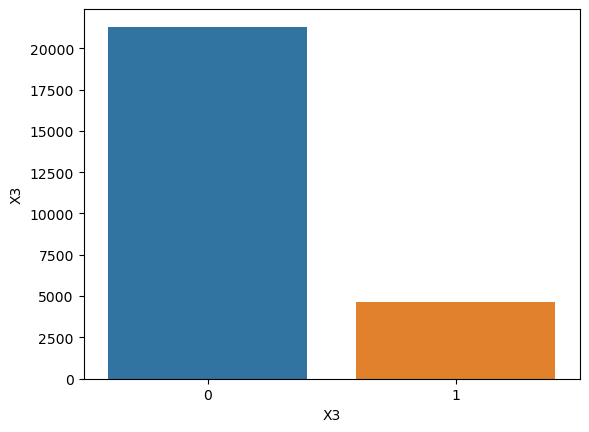

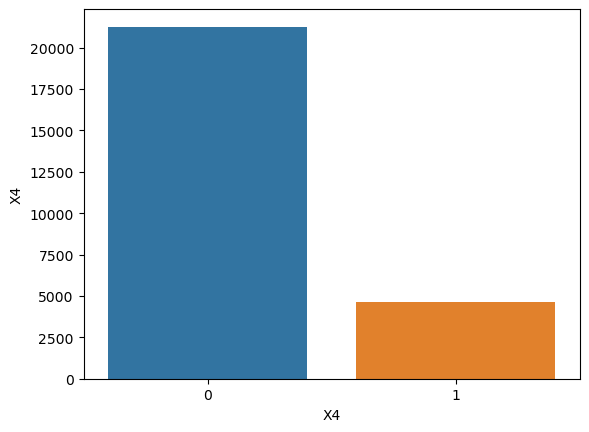

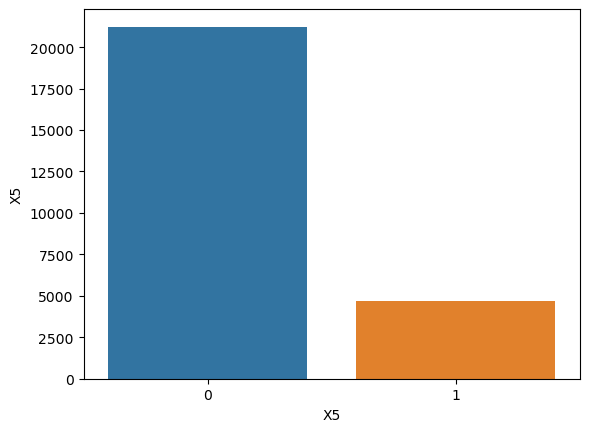

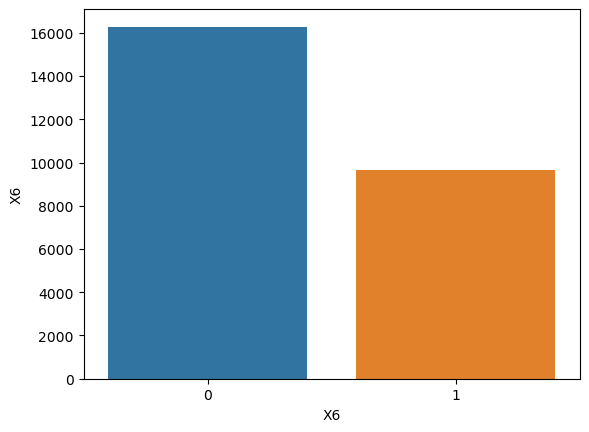

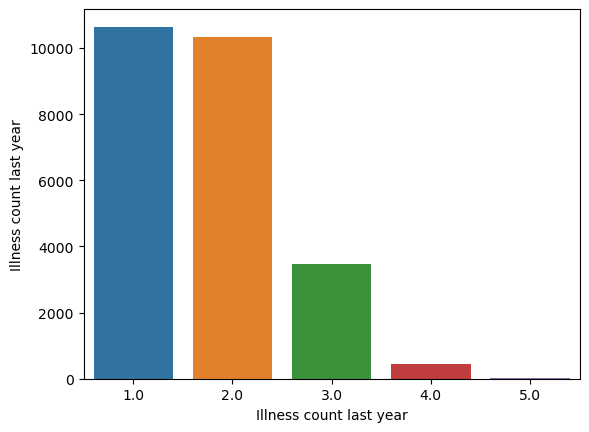

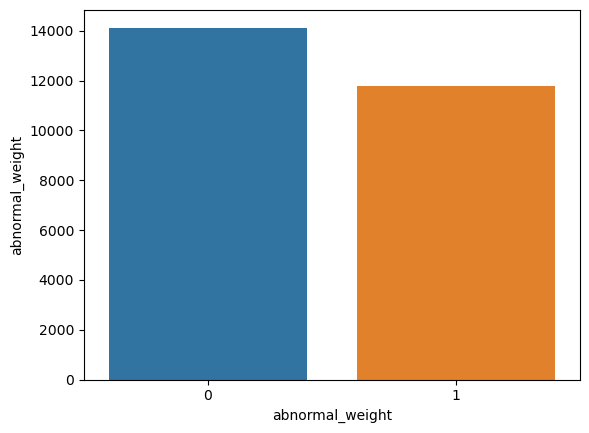

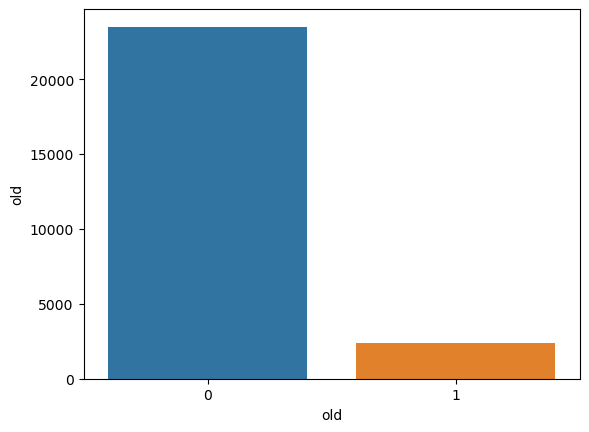

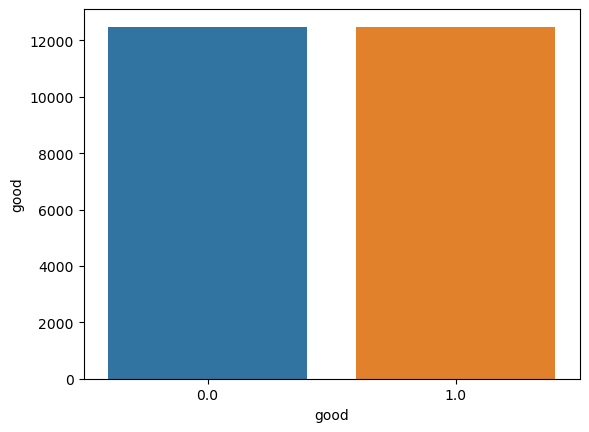

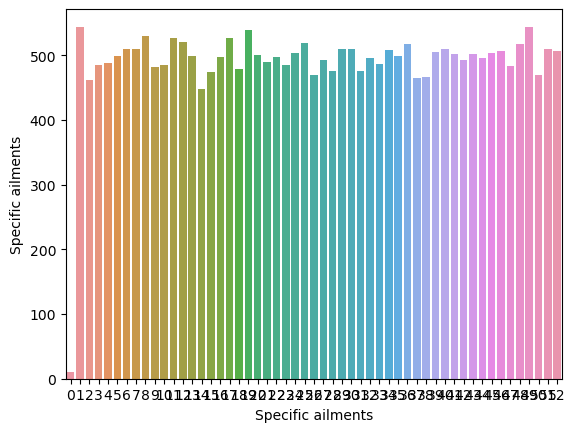

In [73]:
plt.figure(figsize=(5,5))
for i in class_num_col:
    plt.xlabel(i)
    sns.barplot(y=df[i].value_counts(),x=df[i].value_counts().index)
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21764\449580138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f')


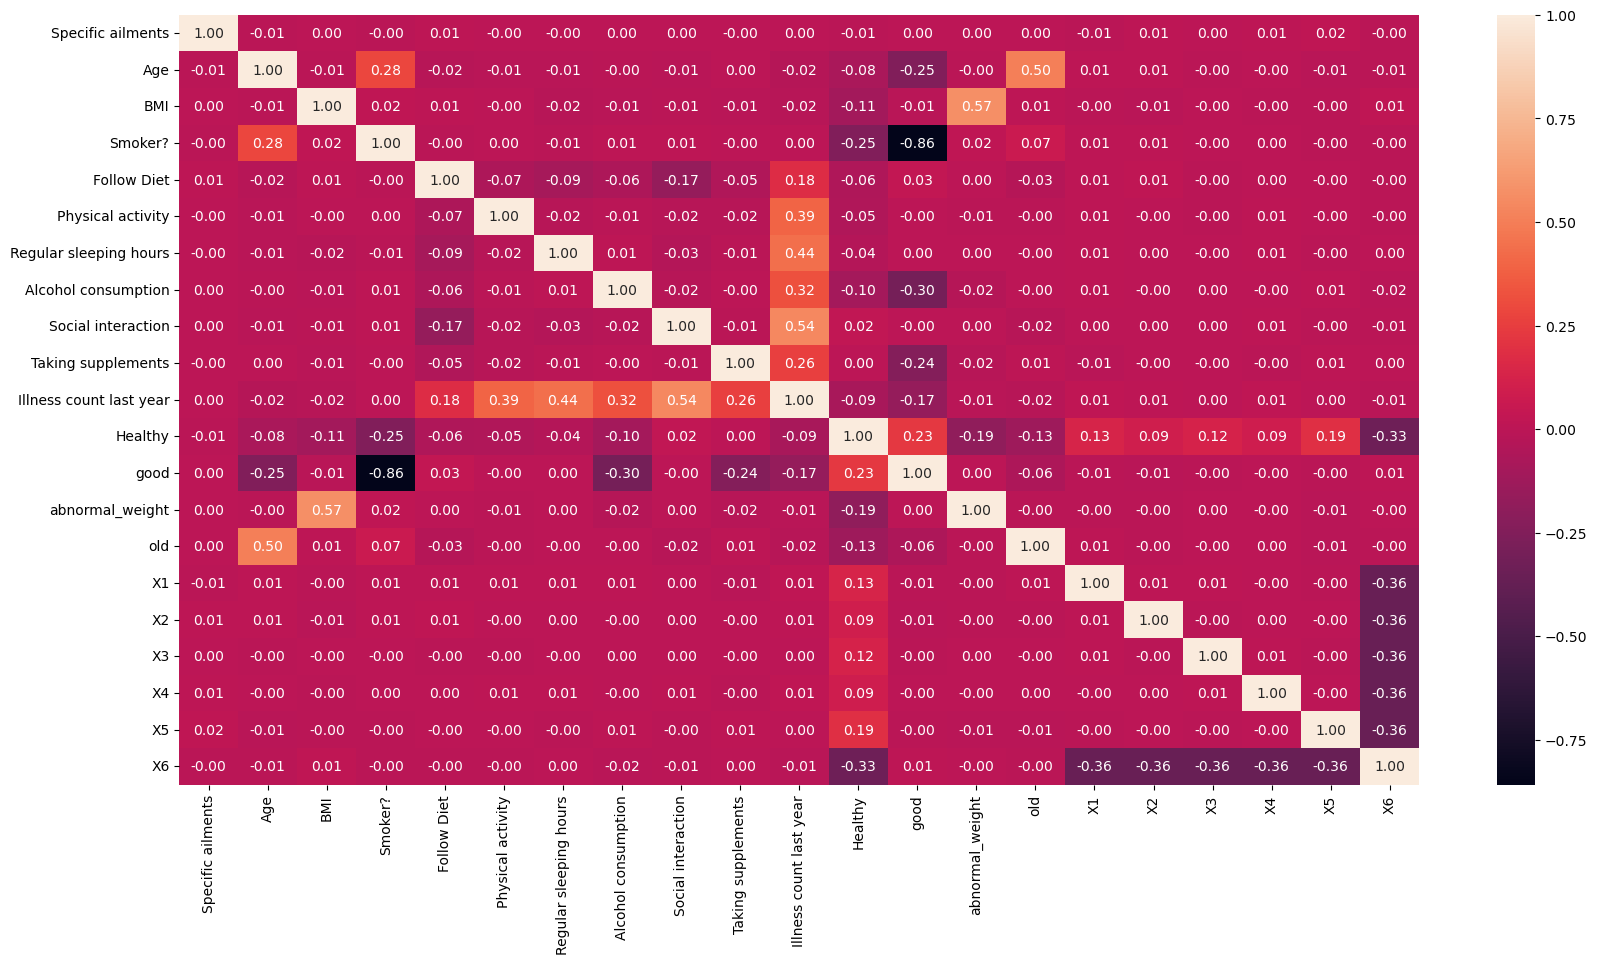

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [75]:
df[df['Smoker?']==1].Healthy.value_counts()

0    5637
1    5335
Name: Healthy, dtype: int64

In [76]:
# When a person smokes he has equal probabalities to be healthy or not

In [77]:
df[df['Smoker?']==0].Healthy.value_counts()

1    10965
0     3983
Name: Healthy, dtype: int64

In [78]:
# When a person don't smokes he is more probable to be healthy

In [79]:
#df[df['Follow Diet']==1].Healthy.value_counts()/total_

In [80]:
df[df['Follow Diet']==0].Healthy.value_counts()

1    1827
0     774
Name: Healthy, dtype: int64

In [81]:
# when a person follows diet he is more probable to be healthy

In [82]:
df[df['Physical activity']==1].Healthy.value_counts()

1    1932
0    1512
Name: Healthy, dtype: int64

In [83]:
df[df['Physical activity']==0].Healthy.value_counts()

1    13622
0     7881
Name: Healthy, dtype: int64

In [84]:
# when a person doesn't have physical acitivity is more prone to be unhealthy

In [85]:
df[df['Alcohol consumption']==0].Healthy.value_counts()

1    14583
0     8263
Name: Healthy, dtype: int64

In [86]:
df[df['Regular sleeping hours']==0].Healthy.value_counts()

1    12864
0     7483
Name: Healthy, dtype: int64

In [87]:
df[df['Regular sleeping hours']==1].Healthy.value_counts()

1    2690
0    1910
Name: Healthy, dtype: int64

In [88]:
#df['score']=df['Follow Diet']+df['Physical activity']+df['Regular sleeping hours']+df['Social interaction']-df['Smoker?']-df['Alcohol consumption']

In [89]:
df.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,...,Healthy,good,abnormal_weight,old,X1,X2,X3,X4,X5,X6
0,44,6,49,20.500470,0,RURAL,1.0,0.0,0.0,0.0,...,1,1.0,0,0,0,0,0,0,0,1
1,39,34,20,26.076580,0,URBAN,0.0,0.0,0.0,0.0,...,1,1.0,1,0,0,0,1,1,0,0
2,29,6,1,21.420866,0,URBAN,1.0,0.0,0.0,0.0,...,0,1.0,0,0,0,0,0,0,0,1
3,27,1,30,25.203247,0,RURAL,1.0,0.0,0.0,0.0,...,1,1.0,1,0,1,0,0,0,0,0
4,9,6,40,19.355846,1,RURAL,1.0,0.0,0.0,0.0,...,1,0.0,0,0,0,0,0,0,0,1


C:\Users\DELL\AppData\Local\Temp\ipykernel_21764\449580138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f')


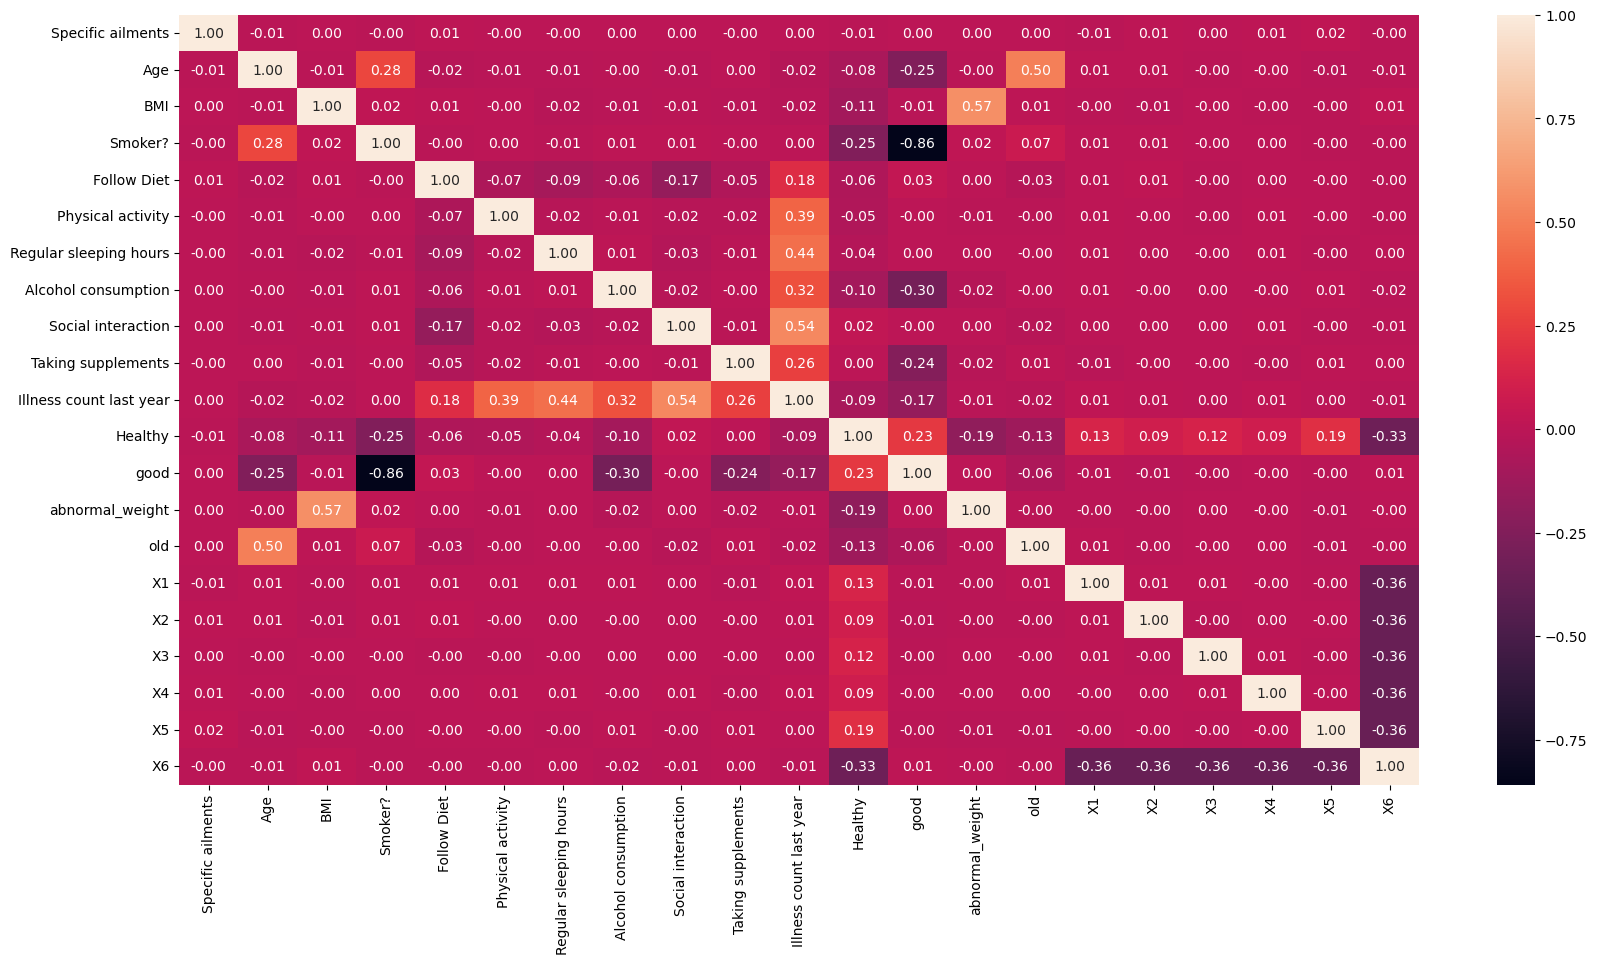

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [91]:
#Seperation into independent and target feature
X=df.drop(columns=['Healthy'],axis=1)
y=df['Healthy']

In [92]:
#train test validate split
from sklearn.model_selection import train_test_split
X_total, X_test, y_total, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_total, y_total, test_size=0.15, random_state=42)

In [93]:
median_age=X_train['Age'].median()
X_train['Age'] = X_train['Age'].replace(0,median_age)
X_val['Age'] = X_val['Age'].replace(0,median_age)
X_test['Age'] = X_test['Age'].replace(0,median_age)


In [94]:
# Creating training pipeline to handle missing values and encode categorical columns
from sklearn.impute import SimpleImputer #Handling Missing values
from sklearn.preprocessing import MinMaxScaler,StandardScaler #Feature Scaling
from sklearn.preprocessing import OneHotEncoder


# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [95]:
# Numerical pipeline
num_cont_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        #('scaler',StandardScaler())

    ]
)
num_class_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        #('scaler',MinMaxScaler())

    ]
)
# Categorical pipeline
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(sparse=False)),
        #('scaler',StandardScaler())

    ]
)
preprocessor=ColumnTransformer([
    ('num_cont',num_cont_pipeline,cont_num_col),
    ('num_class',num_class_pipeline,class_num_col),
    ('cat',cat_pipeline,cat_col),
])

In [96]:
# Applying the pipelines to train_set and test_test
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_val=pd.DataFrame(preprocessor.fit_transform(X_val),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
X_train.head()

,num_cont__Age,num_cont__BMI,num_class__Smoker?,num_class__Follow Diet,num_class__Physical activity,num_class__Regular sleeping hours,num_class__Alcohol consumption,num_class__Social interaction,num_class__Taking supplements,num_class__X1,...,num_class__X4,num_class__X5,num_class__X6,num_class__Illness count last year,num_class__abnormal_weight,num_class__old,num_class__good,num_class__Specific ailments,cat__Living in?_RURAL,cat__Living in?_URBAN
0,21.0,29.682346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,33.0,1.0,0.0
1,3.0,17.718007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0,0.0
2,15.0,19.037534,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,51.0,1.0,0.0
3,12.0,22.645442,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,29.0,1.0,0.0
4,44.0,20.772568,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,1.0,0.0


In [98]:
# oversampling the X-train with SMOTE
#from imblearn.over_sampling import SMOTE
#oversample=SMOTE()
#X_train,y_train=oversample.fit_resample(X_train,y_train)

In [99]:
y_train.unique()

array([0, 1], dtype=int64)

In [100]:





X_train.head()

,num_cont__Age,num_cont__BMI,num_class__Smoker?,num_class__Follow Diet,num_class__Physical activity,num_class__Regular sleeping hours,num_class__Alcohol consumption,num_class__Social interaction,num_class__Taking supplements,num_class__X1,...,num_class__X4,num_class__X5,num_class__X6,num_class__Illness count last year,num_class__abnormal_weight,num_class__old,num_class__good,num_class__Specific ailments,cat__Living in?_RURAL,cat__Living in?_URBAN
0,21.0,29.682346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,33.0,1.0,0.0
1,3.0,17.718007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0,0.0
2,15.0,19.037534,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,51.0,1.0,0.0
3,12.0,22.645442,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,29.0,1.0,0.0
4,44.0,20.772568,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,1.0,0.0


In [101]:

len(X_train.columns)


22

In [103]:
!pip install catboost


     -------------------------------------- 101.0/101.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 15.5/15.5 MB 653.2 kB/s eta 0:00:00


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,confusion_matrix,log_loss,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [105]:
X_train.head()

,num_cont__Age,num_cont__BMI,num_class__Smoker?,num_class__Follow Diet,num_class__Physical activity,num_class__Regular sleeping hours,num_class__Alcohol consumption,num_class__Social interaction,num_class__Taking supplements,num_class__X1,...,num_class__X4,num_class__X5,num_class__X6,num_class__Illness count last year,num_class__abnormal_weight,num_class__old,num_class__good,num_class__Specific ailments,cat__Living in?_RURAL,cat__Living in?_URBAN
0,21.0,29.682346,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,33.0,1.0,0.0
1,3.0,17.718007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,1.0,0.0
2,15.0,19.037534,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,51.0,1.0,0.0
3,12.0,22.645442,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,29.0,1.0,0.0
4,44.0,20.772568,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,1.0,0.0


In [106]:
#select=SelectKBest(k=22)
#X_new_train=select.fit_transform(X_train,y_train)
#X_new_val=select.transform(X_val)
#selected_features=select.get_feature_names_out()
model=[LogisticRegression(max_iter=1000),RandomForestClassifier(max_depth=1,class_weight='balanced'),DecisionTreeClassifier(max_depth=1),GaussianNB(),GradientBoostingClassifier(max_depth=4),CatBoostClassifier(verbose=False,iterations=100,depth=1),LGBMClassifier(learning_rate=0.1,max_depth=1,verbose=-1,max_bin=10,num_iterations=200,num_leaves=10),AdaBoostClassifier(),XGBClassifier(max_depth=2),KNeighborsClassifier(n_neighbors=10),SVC()]
for m in model:
    m.fit(X_train,y_train)
   
    
    print(m," ")
    
    print('Val: ',f1_score(y_val,m.predict(X_val)))
    print('Train: ',f1_score(y_train,m.predict(X_train)))
    print("="*30,"\n")

LogisticRegression(max_iter=1000)  
Val:  0.8084326306141155
Train:  0.8101697668751523

RandomForestClassifier(class_weight='balanced', max_depth=1)  
Val:  0.7925079056190708
Train:  0.7798396933263635

DecisionTreeClassifier(max_depth=1)  
Val:  0.7629013079667063
Train:  0.7510534156203448

GaussianNB()  
Val:  0.7841130604288499
Train:  0.7762859633827375

GradientBoostingClassifier(max_depth=4)  
Val:  0.869726471951785
Train:  0.8812955599734923

Val:  0.8543076229138475
Train:  0.8535215786940479

LGBMClassifier(max_bin=10, max_depth=1, num_iterations=200, num_leaves=10,
               verbose=-1)  
Val:  0.8410714285714285
Train:  0.8406372919067107



C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


AdaBoostClassifier()  
Val:  0.8576684295240286
Train:  0.8536995285919247

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)  
Val:  0.8646880112175742
Train:  0.8702666555211902

KNeighborsClassifier(n_neighbors=10)  
Val:  0.791481394804587
Train:  0.8313774973711883

SVC()  
Val:  0.8274678111587

In [107]:
#hyper parameter tuning
param_gbc={
    'learning_rate':[0.1,0.05,0.5],
    'n_estimators':[50,200,300],
    'max_depth':[1,2,3,4,5]
}

In [108]:
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier()
grid=GridSearchCV(gbc,param_gbc,scoring='f1',cv=3,return_train_score=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=(train=0.813, test=0.818) total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=(train=0.816, test=0.816) total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=(train=0.818, test=0.813) total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=(train=0.851, test=0.848) total time=   1.1s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=(train=0.847, test=0.854) total time=   1.1s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=(train=0.852, test=0.845) total time=   1.1s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=(train=0.855, test=0.851) total time=   1.7s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=(train=0.851, test=0.856) total time=   1.5s
[CV 3/3] END learning

[CV 3/3] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=(train=0.877, test=0.863) total time=   4.0s
[CV 1/3] END learning_rate=0.05, max_depth=4, n_estimators=50;, score=(train=0.858, test=0.853) total time=   0.8s
[CV 2/3] END learning_rate=0.05, max_depth=4, n_estimators=50;, score=(train=0.857, test=0.857) total time=   0.8s
[CV 3/3] END learning_rate=0.05, max_depth=4, n_estimators=50;, score=(train=0.858, test=0.844) total time=   0.8s
[CV 1/3] END learning_rate=0.05, max_depth=4, n_estimators=200;, score=(train=0.883, test=0.871) total time=   3.4s
[CV 2/3] END learning_rate=0.05, max_depth=4, n_estimators=200;, score=(train=0.883, test=0.872) total time=   3.4s
[CV 3/3] END learning_rate=0.05, max_depth=4, n_estimators=200;, score=(train=0.885, test=0.865) total time=   3.4s
[CV 1/3] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=0.891, test=0.874) total time=   5.4s
[CV 2/3] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(tra

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 200, 300]},
             return_train_score=True, scoring='f1', verbose=3)

In [109]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [110]:
grid.best_score_

0.8731773631923395

In [111]:
opt_gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=200)
opt_gbc.fit(X_train,y_train)
print(f1_score(y_test,opt_gbc.predict(X_test)))

0.8791959798994974


In [112]:
xgb=XGBClassifier()
grid_xgb=GridSearchCV(xgb,param_gbc,scoring='f1',cv=3,return_train_score=True,verbose=3)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=(train=0.814, test=0.819) total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=(train=0.815, test=0.815) total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=50;, score=(train=0.817, test=0.809) total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=(train=0.851, test=0.849) total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=(train=0.848, test=0.854) total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=(train=0.851, test=0.845) total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=(train=0.856, test=0.853) total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=(train=0.852, test=0.857) total time=   0.3s
[CV 3/3] END learning

[CV 3/3] END learning_rate=0.05, max_depth=3, n_estimators=300;, score=(train=0.877, test=0.864) total time=   0.8s
[CV 1/3] END learning_rate=0.05, max_depth=4, n_estimators=50;, score=(train=0.856, test=0.852) total time=   0.1s
[CV 2/3] END learning_rate=0.05, max_depth=4, n_estimators=50;, score=(train=0.854, test=0.858) total time=   0.1s
[CV 3/3] END learning_rate=0.05, max_depth=4, n_estimators=50;, score=(train=0.857, test=0.844) total time=   0.1s
[CV 1/3] END learning_rate=0.05, max_depth=4, n_estimators=200;, score=(train=0.883, test=0.874) total time=   0.7s
[CV 2/3] END learning_rate=0.05, max_depth=4, n_estimators=200;, score=(train=0.883, test=0.874) total time=   0.7s
[CV 3/3] END learning_rate=0.05, max_depth=4, n_estimators=200;, score=(train=0.886, test=0.864) total time=   0.7s
[CV 1/3] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=0.891, test=0.878) total time=   1.1s
[CV 2/3] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(tra

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 200, 300]},
             return_train_score=True, scoring='f1', verbose=3)

In [113]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [114]:
grid_xgb.best_score_

0.8746970291114601

In [115]:
opt_xgb=XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=200)
opt_xgb.fit(X_train,y_train)
print(f1_score(y_test,opt_xgb.predict(X_test)))

0.8792270531400966


In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

select = SelectKBest(score_func=f_classif, k=10)  
select.fit(X_train, y_train)

X_new_train = select.transform(X_train)
X_new_test = select.transform(X_test)

estimators = [
    ('gbc', GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stack_model.fit(X_new_train, y_train)
y_pred = stack_model.predict(X_new_test)
y_train_pred = stack_model.predict(X_new_train)

print("TEST:", f1_score(y_test, y_pred), "TRAIN:", f1_score(y_train, y_train_pred))


TEST: 0.7977707006369428 TRAIN: 0.7980380842469705


In [118]:
f1_score(y_test,(opt_gbc.predict(X_test)| opt_xgb.predict(X_test)))

0.8803980099502487

In [119]:
final_model=opt_xgb


In [120]:
df_test=pd.read_csv('test.csv')
df_test.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [121]:
df_test['Any heriditary condition?'].value_counts()

Stable    6480
Name: Any heriditary condition?, dtype: int64

In [122]:
df_test=df_test.drop(columns=['ID1','ID2','Any heriditary condition?','Mental health management'],axis=1)

In [123]:
df_test['Smoker?'] = df_test['Smoker?'].apply(lambda x: 1 if x == 'YES' else 0)

In [124]:
df_test['Food preference']=df_test['Food preference'].fillna("")
df_test['Food preference']=df_test['Food preference'].apply(remove_special)
df_test['Food preference']=df_test['Food preference'].astype('str')

df_test['X1']=df_test['Food preference'].apply(lambda x:1 if '1' in x else 0)
df_test['X2']=df_test['Food preference'].apply(lambda x:1 if '2' in x else 0)
df_test['X3']=df_test['Food preference'].apply(lambda x:1 if '3' in x else 0)
df_test['X4']=df_test['Food preference'].apply(lambda x:1 if '4' in x else 0)
df_test['X5']=df_test['Food preference'].apply(lambda x:1 if '5' in x else 0)
df_test['X6']=df_test['Food preference'].apply(lambda x:1 if '6' in x else 0)




In [125]:
df_test['abnormal_weight']=df_test['BMI'].apply(lambda x:1 if (x<18 or x>25) else 0)
#df['over_weight']=df['BMI'].apply(lambda x:1 if x>25 else 0)
#df_test['normal_weight']=df_test['BMI'].apply(lambda x:1 if (x<=25 and x>=18) else 0)
df_test['old']=df_test['Age'].apply(lambda x:1 if x>60 else 0)
df_test=add_good(df_test)
df_test['Age'] = df_test['Age'].replace(0,median_age)

In [126]:
df_test.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,...,Illness count last year,X1,X2,X3,X4,X5,X6,abnormal_weight,old,good
0,2,6,38,18.879331,1,URBAN,0.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,1,0,0,0.0
1,5,1,46,21.231991,0,URBAN,1.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,0,0,0,1.0
2,37,4,11,17.867876,0,RURAL,1.0,0.0,0.0,0.0,...,1.0,0,0,0,1,0,0,1,0,1.0
3,44,5,10,26.886096,0,RURAL,1.0,0.0,0.0,1.0,...,2.0,0,0,0,0,1,0,1,0,0.0
4,37,34,3,23.362746,0,RURAL,0.0,1.0,0.0,1.0,...,2.0,0,0,1,1,0,0,0,0,0.0


In [127]:
df_test=df_test.drop(columns=['Food preference'],axis=1)

In [128]:
#preprocessing test data
X_sub=pd.DataFrame(preprocessor.transform(df_test),columns=preprocessor.get_feature_names_out())
#X_new_sub=select.transform(X_sub)

In [129]:
X_sub.shape

(6480, 22)

In [130]:
#predictions
y_pred=final_model.predict(X_sub)

In [131]:
submission_df=pd.DataFrame(data=y_pred,columns=['predictions'])

In [132]:
submission_df.shape

(6480, 1)

In [133]:
submission_df.isnull().sum()

predictions    0
dtype: int64

In [134]:
#final csv
submission_df.to_csv('xgb_submission(22).csv',index=False,header=True)